In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
from load_mnist_1 import *


In [2]:
print("loaded data set from mnist_1 method")



loaded data set from mnist_1 method


plot train images
plot test images - more


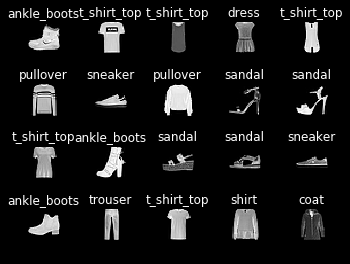

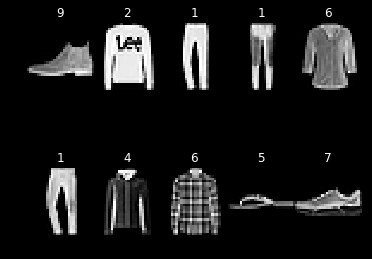

In [3]:
train_images, train_labels = load_images_train()
train_labels_str = image_class_to_str(train_labels)

test_images, test_labels = load_images_test()
test_lables_str = image_class_to_str(test_labels)



print("plot train images")
plot_images(train_images, train_labels_str)
print("plot test images - more")
plot_images(test_images, test_labels, imgs=10, cols=5)



In [4]:
# https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a 
# https://towardsdatascience.com/keras-transfer-learning-for-beginners-6c9b8b7143e 

In [5]:

# https://betweenandbetwixt.com/2019/01/04/convolutional-neural-network-with-keras-mnist/
from keras.layers import Dense,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam, SGD, Adadelta


from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.layers import Dense, Conv2D, Activation, Flatten, MaxPool2D, BatchNormalization
from keras.models import Sequential

from keras.utils import to_categorical

/data/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:

# keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

model = Sequential()
model.add(
    Conv2D(
        filters=8, 
        kernel_size=3, 
        padding="same", 
        input_shape=(28,28,1), 
        data_format="channels_last"))

model.add(Activation("relu"))

model.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))

model.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

model.add(Flatten()) # Stretching out for our FC layer
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(128))
model.add(Activation("relu"))
		
model.add(Dense(10,activation='softmax'))




# print the cnn arch
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv

In [7]:
# compile, must specify loss function and optmiser function 
# this binary classification so binary_crossentropy is used for loss function,  
# could be other things for different problems, such as category_crossentropy

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss="categorical_crossentropy",
#               optimizer=sgd, # Adam(),
#               metrics=["accuracy"])
# val accuracy = .9

# model.compile(loss="categorical_crossentropy",
#               optimizer=Adam(),
#               metrics=["accuracy"])
#               Test accuracy: 0.9134

model.compile(loss="categorical_crossentropy",
            optimizer=Adadelta(),
            metrics=["accuracy"])
# Test accuracy: 0.9157 5 epoch
# Test accuracy: 0.918 10 epoch


0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


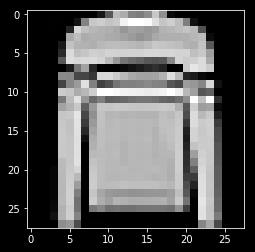

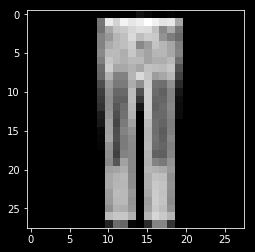

In [8]:
# reshape inputs 
no_images_train = len(train_images)
no_images_test = len(test_images)


train_images_reshape = train_images.reshape(no_images_train, 28,28,1)
test_images_reshape = test_images.reshape(no_images_test, 28,28,1)



train_labels_cat = to_categorical(train_labels, num_classes=10)
test_labels_cat = to_categorical(test_labels, num_classes=10)
print(train_labels[10])
print(train_labels_cat[10])

print(train_labels[5])
print(train_labels_cat[5])


plt.imshow(train_images_reshape[5].reshape(28,28), cmap="gray")
plt.show()
plt.imshow(test_images_reshape[15].reshape(28,28), cmap="gray")
plt.show()

train_images_reshape = train_images_reshape / 255
test_images_reshape = test_images_reshape / 255

In [9]:
history = model.fit(
    train_images_reshape, 
    train_labels_cat, 
    epochs=20,
    batch_size=128,
    validation_data=(test_images_reshape, test_labels_cat))

# o cam see high training accuracy and lower test accuracy, suggesing high variance
# this will require regulaisation or larger data 
# regularisation is likey to be the solution here to avoid this overfitting



Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.6629 - acc: 0.7512 - val_loss: 0.3910 - val_acc: 0.8525
Epoch 2/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.3243 - acc: 0.8796 - val_loss: 0.3053 - val_acc: 0.8854
Epoch 3/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2619 - acc: 0.9033 - val_loss: 0.2821 - val_acc: 0.8975
Epoch 4/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.2250 - acc: 0.9161 - val_loss: 0.2620 - val_acc: 0.9040
Epoch 5/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1978 - acc: 0.9257 - val_loss: 0.2832 - val_acc: 0.8964
Epoch 6/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1746 - acc: 0.9341 - val_loss: 0.2454 - val_acc: 0.9151
Epoch 7/20
60000/60000 [==============================] - 8s 127us/step -

In [10]:
# We can get our score
score = model.evaluate(test_images_reshape, test_labels_cat, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.5369129529541198
Test accuracy: 0.9155


dict_keys(['loss', 'val_acc', 'val_loss', 'acc'])


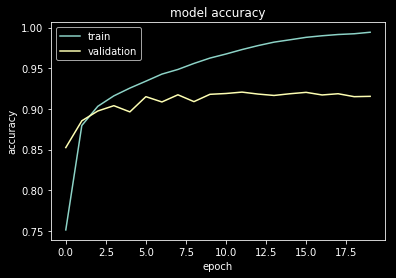

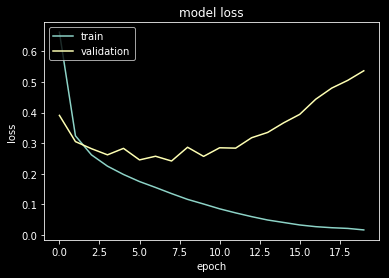

In [11]:
# https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
